In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "./Banana_new/Training",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 600 files belonging to 2 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "./Banana_new/Validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 200 files belonging to 2 classes.


In [4]:
# # Advanced model
# # Define the input layer
# input_layer = tf.keras.layers.Input(shape=(224,224,3))
# # Add convolutional layers
# x = tf.keras.layers.Conv2D(32,(3, 3), activation='relu')(input_layer)
# x = tf.keras.layers.Conv2D(64,(3, 3), activation='relu')(x)
# x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)
# # x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Conv2D(64,(3, 3), activation='relu')(x)
# x = tf.keras.layers.Conv2D(64,(3, 3), activation='relu')(x)
# x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)
# # x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Conv2D(64,(3, 3), activation='relu')(x)
# x = tf.keras.layers.Conv2D(64,(3, 3), activation='relu')(x)
# x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# # Flatten the output of the convolutional layers
# x = tf.keras.layers.Flatten()(x)
# # Add dense layers
# x = tf.keras.layers.Dense(units=256, activation='relu')(x)
# x = tf.keras.layers.Dense(units=128, activation='relu')(x)
# # Add dropout layer to avoid overfitting
# x = tf.keras.layers.Dropout(0.5)(x)
# # Add output layer
# output_layer = tf.keras.layers.Dense(units=2, activation='softmax')(x)

# # Create the model
# cnn = tf.keras.Model(inputs=input_layer, outputs=output_layer)
# # Compile the model
# cnn.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [5]:
# Advanced model
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(224,224,3))
# Add convolutional layers
x = tf.keras.layers.Conv2D(64, (5, 5), activation='relu')(input_layer)
x = tf.keras.layers.Conv2D(64, (5, 5), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)
x = tf.keras.layers.Conv2D(128, (5, 5), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)
x = tf.keras.layers.Conv2D(128, (5, 5), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)
# Flatten the output of the convolutional layers
x = tf.keras.layers.Flatten()(x)
# Add dense layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
# Add dropout layer to avoid overfitting
x = tf.keras.layers.Dropout(0.3)(x)
# Add output layer
output_layer = tf.keras.layers.Dense(units=2, activation='softmax')(x)

# Create the model
cnn = tf.keras.Model(inputs=input_layer, outputs=output_layer)
# Compile the model
cnn.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [6]:
cnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 216, 216, 64)   │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 107, 107, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 103, 103, 128)  │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 51, 51, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,930,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,816,834 (33.63 MB)

 Trainable params: 8,816,834 (33.63 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history=cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 204s 11s/step - accuracy: 0.5018 - loss: 37.1209 - val_accuracy: 0.8050 - val_loss: 0.6155
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 134s 7s/step - accuracy: 0.7382 - loss: 0.6695 - val_accuracy: 0.8650 - val_loss: 0.3831
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.8385 - loss: 0.3844 - val_accuracy: 0.8100 - val_loss: 0.4637
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.7952 - loss: 0.7960 - val_accuracy: 0.8200 - val_loss: 0.5171
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.8105 - loss: 0.5328 - val_accuracy: 0.9250 - val_loss: 0.2487


In [8]:
cnn.save('banana_leaf_model_3.h5')

In [9]:
history.history #return dictionary of history

{'accuracy': [0.5233333110809326,
  0.7599999904632568,
  0.8066666722297668,
  0.75,
  0.82833331823349],
 'loss': [16.039928436279297,
  0.5878495573997498,
  0.38988950848579407,
  0.9436815977096558,
  0.47567787766456604],
 'val_accuracy': [0.8050000071525574,
  0.8650000095367432,
  0.8100000023841858,
  0.8199999928474426,
  0.925000011920929],
 'val_loss': [0.6155233383178711,
  0.38311269879341125,
  0.46369075775146484,
  0.5170621275901794,
  0.24872525036334991]}

In [10]:
#recording history
import json
with open('training_history.json','w') as f:
  json.dump(history.history,f)
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [11]:
print("validation set accuracy: {} %".format(history.history['val_accuracy'][-1]*100))

validation set accuracy: 92.5000011920929 %


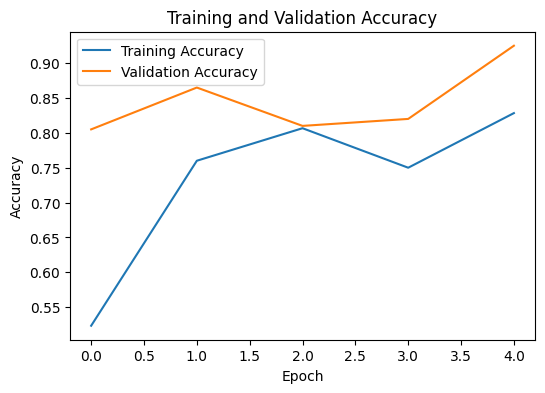

In [12]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy and loss history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


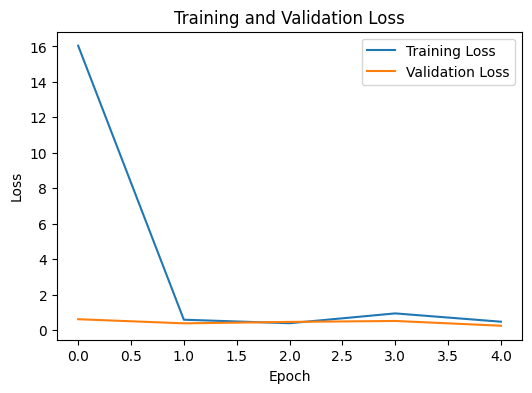

In [13]:
# Plot the training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()